<a href="https://colab.research.google.com/github/Rohan-69108/BLINK-IT-SALE-REVENEU/blob/main/blink_it_residual_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
revenue=pd.read_csv("weekly_features.csv")

In [ ]:
revenue.head()


,year,week,weekly_revenue,order_count,upi_share,cash_payment_ratio,avg_order_value,retention_rate,avg_delivery_delay,on_time_delivery_rate,avg_stock_received,avg_damaged_stock,unique_products_stocked
0,2023,11,60674.33,29,0.172414,0.206897,2092.218276,0.000000,2.0,0.413793,2.000000,1.021739,221
1,2023,12,121729.40,52,0.173077,0.269231,2340.950000,0.068966,4.0,0.365385,1.820912,1.105673,266
2,2023,13,124700.57,54,0.203704,0.314815,2309.269815,0.000000,2.0,0.407407,1.873884,1.046875,264
3,2023,14,144800.38,60,0.250000,0.266667,2413.339667,0.000000,1.5,0.466667,2.068508,0.983425,265
4,2023,15,130769.15,63,0.174603,0.333333,2075.700794,0.016667,2.0,0.396825,1.968254,1.037037,267


In [ ]:
y=revenue["weekly_revenue"]
X=revenue.drop("weekly_revenue",axis=1)

In [ ]:
X.head()

,year,week,order_count,upi_share,cash_payment_ratio,avg_order_value,retention_rate,avg_delivery_delay,on_time_delivery_rate,avg_stock_received,avg_damaged_stock,unique_products_stocked
0,2023,11,29,0.172414,0.206897,2092.218276,0.000000,2.0,0.413793,2.000000,1.021739,221
1,2023,12,52,0.173077,0.269231,2340.950000,0.068966,4.0,0.365385,1.820912,1.105673,266
2,2023,13,54,0.203704,0.314815,2309.269815,0.000000,2.0,0.407407,1.873884,1.046875,264
3,2023,14,60,0.250000,0.266667,2413.339667,0.000000,1.5,0.466667,2.068508,0.983425,265
4,2023,15,63,0.174603,0.333333,2075.700794,0.016667,2.0,0.396825,1.968254,1.037037,267


In [ ]:
# Splitted first
X_train, X_test, y_train_o, y_test_o = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale using only training data stats
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
Lin=LinearRegression()

In [ ]:
Lin.fit(X_train_scaled,y_train_o)

LinearRegression()

In [ ]:
y_pred_o=Lin.predict(X_test_scaled)

In [ ]:
y_pred_o

array([123026.90015375,  28612.17898673, 105015.21540188, 151143.35980836,
       144950.35920322, 115240.96644582, 126038.84127439, 107995.0475532 ,
       132934.92519639, 119910.03314215, 138355.12035955, 105649.65383882,
        97229.79245257, 130311.36090019, 118974.97662997, 117076.50030422,
       144964.10188303, 119223.93231726])

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score

In [ ]:
print("The R2 score is:",r2_score(y_test_o,y_pred_o))

The R2 score is: 0.8516961732361333


In [ ]:
print("The Mean Squared Error is:",mean_squared_error(y_test_o,y_pred_o))

The Mean Squared Error is: 60972169.94734618


In [ ]:
Residuals=y_test_o-y_pred_o

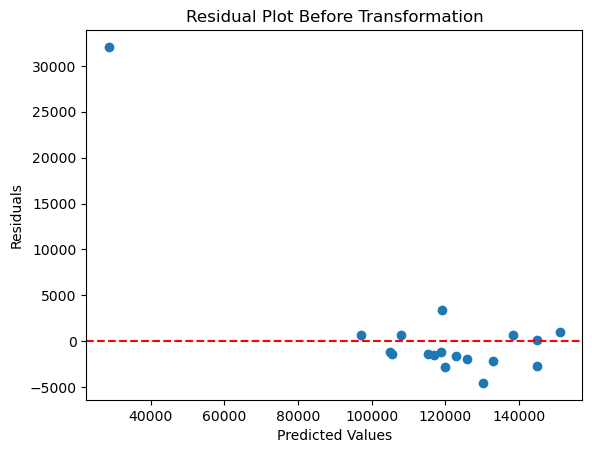

In [ ]:
plt.scatter(y_pred_o,Residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot Before Transformation");
#Outlier is also detected

In [ ]:
#To check distribution of my response variable

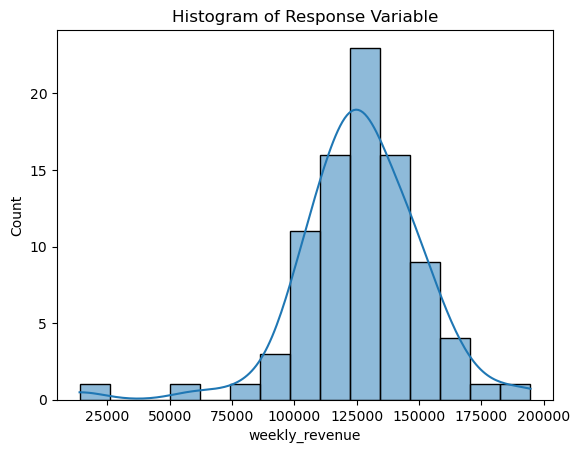

In [ ]:
sns.histplot(y, kde=True)
plt.title("Histogram of Response Variable")
plt.show()

In [ ]:
from scipy.stats import skew
skew_value = skew(y)
print("Skewness:", skew_value) #Negative skewed data

Skewness: -0.9105507750736941


In [ ]:
from scipy.stats import kurtosis

#This gives excess kurtosis
kurt = kurtosis(y)
print("Excess Kurtosis:", kurt)

# To get normal kurtosis
kurt_full = kurtosis(y, fisher=False)
print("Kurtosis:", kurt_full)


Excess Kurtosis: 4.472746990994402
Kurtosis: 7.472746990994402


#Indicates it is leptokurtic and negatively skewed data

Box-Cox lambda: 1.644505449440166


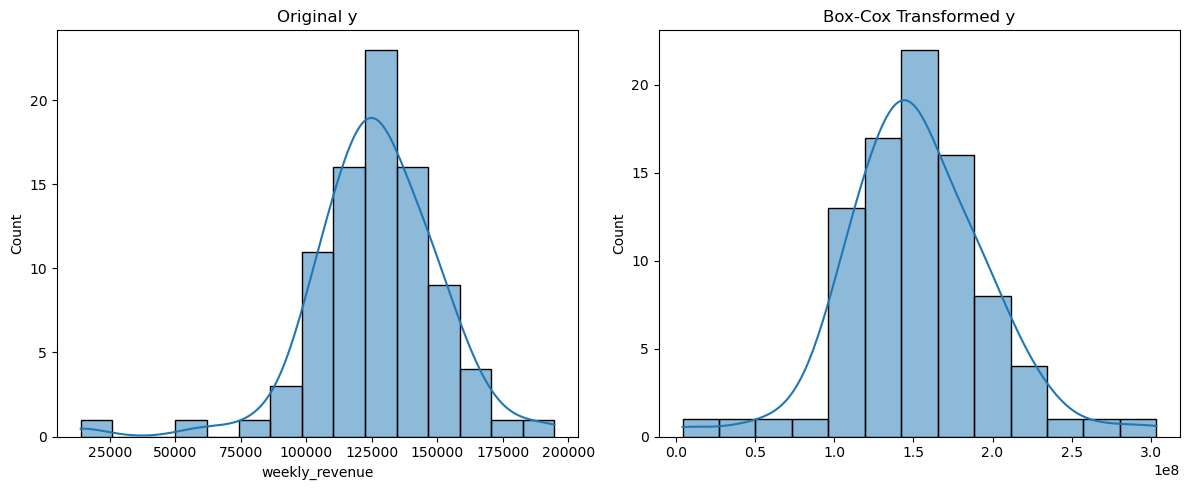

In [ ]:

from scipy.stats import boxcox
#Checking if y is strictly positive
if np.any(y <= 0):
    # If not, shift y to be strictly positive
    y_shifted = y - np.min(y) + 1
else:
    y_shifted = y

# Apply Box-Cox
y_boxcox, fitted_lambda = boxcox(y_shifted)

print("Box-Cox lambda:", fitted_lambda)

# Visualize the result
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(y, kde=True)
plt.title("Original y")

plt.subplot(1, 2, 2)
sns.histplot(y_boxcox, kde=True)
plt.title("Box-Cox Transformed y")

plt.tight_layout()
plt.show()


In [ ]:
df = pd.DataFrame({
    'Original_y': y,
    'BoxCox_Transformed_y': y_boxcox
})

In [ ]:
df.head()

,Original_y,BoxCox_Transformed_y
0,60674.33,4.463160e+07
1,121729.40,1.402572e+08
2,124700.57,1.459312e+08
3,144800.38,1.865858e+08
4,130769.15,1.577922e+08


## Linear regression assumes:
Linearity between features and the response
Homoscedasticity (constant variance of residuals)
Normality of residuals
No extreme outliers

## Box-Cox helps satisfy those assumptions by:

Reducing skewness
Stabilizing variance
Reducing the effect of outliers

So training on the transformed response improves model validity and predictive power.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_boxcox, test_size=0.2, random_state=42)


In [ ]:
Lin.fit(X_train_scaled,y_train)

LinearRegression()

In [ ]:
y_box_pred=Lin.predict(X_test_scaled)

In [ ]:
y_box_pred

array([ 1.44238608e+08, -1.33462428e+07,  1.06617800e+08,  2.04200766e+08,
        1.91156425e+08,  1.26564443e+08,  1.47432318e+08,  1.17271533e+08,
        1.61313779e+08,  1.35112839e+08,  1.77133033e+08,  1.06097658e+08,
        9.45219516e+07,  1.56414925e+08,  1.36036420e+08,  1.28709073e+08,
        1.88566411e+08,  1.39836550e+08])

In [ ]:
print("The R2 score for transformed data is:",r2_score(y_test,y_box_pred))
print("The Mean Squared Error is:",mean_squared_error(y_test,y_box_pred))

The R2 score for transformed data is: 0.8447797007973582
The Mean Squared Error is: 199958494272210.8


In [ ]:
# Inverse Box-Cox
from scipy.special import inv_boxcox
y_pred_original = inv_boxcox(y_box_pred, fitted_lambda)

In [ ]:
y_pred_original

array([123819.06685804,             nan, 103032.72854818, 152965.59338498,
       146947.05145036, 114358.01973645, 125479.02434184, 109176.04898182,
       132536.15557959, 118994.55215515, 140294.20273918, 102726.78026973,
        95757.79319026, 130073.88536922, 119488.50976845, 115532.48106383,
       145733.11030126, 121507.25097148])

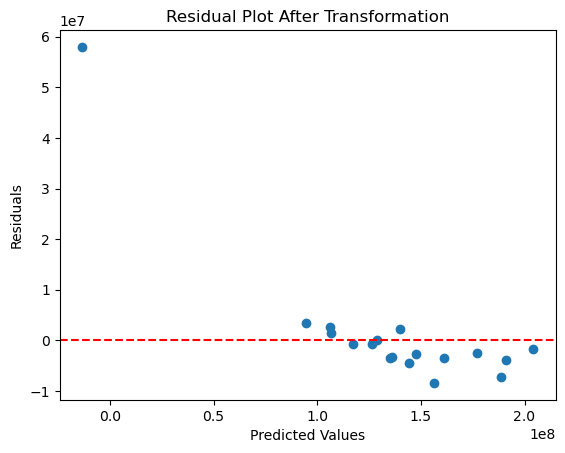

In [ ]:
#Residual Analysis for transformed data
box_cox_residual=y_test-y_box_pred
plt.scatter(y_box_pred,box_cox_residual)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot After Transformation");

In [ ]:
df_1= pd.DataFrame({
    'Original_y': y_test,
    'Predicted_value_after_Transformation': y_box_pred,
    'Residual':box_cox_residual
})

In [ ]:
df_1

,Original_y,Predicted_value_after_Transformation,Residual
0,1.396713e+08,1.442386e+08,-4.567282e+06
1,4.463160e+07,-1.334624e+07,5.797784e+07
2,1.080041e+08,1.066178e+08,1.386320e+06
3,2.024955e+08,2.042008e+08,-1.705301e+06
4,1.872671e+08,1.911564e+08,-3.889287e+06
5,1.257446e+08,1.265644e+08,-8.198473e+05
6,1.447099e+08,1.474323e+08,-2.722388e+06
7,1.164526e+08,1.172715e+08,-8.189820e+05
8,1.577922e+08,1.613138e+08,-3.521579e+06
9,1.316472e+08,1.351128e+08,-3.465655e+06


In [ ]:
#To see actual value,predicted value before transformation and after transformation
df_2= pd.DataFrame({
    'Original_y': y_test_o,
    'Predicted_value_before_Transformation': y_pred_o,
    'Predicted_value_after_Transformation':y_pred_original
})

In [ ]:
df_2
#Observation at 0th index having 28612 value is our outlier

,Original_y,Predicted_value_before_Transformation,Predicted_value_after_Transformation
76,121419.93,123026.900154,123819.066858
0,60674.33,28612.178987,NaN
26,103845.32,105015.215402,103032.728548
22,152187.53,151143.359808,152965.593385
12,145121.68,144950.359203,146947.051450
67,113906.99,115240.966446,114358.019736
10,124064.94,126038.841274,125479.024342
18,108711.78,107995.047553,109176.048982
4,130769.15,132934.925196,132536.155580
68,117129.10,119910.033142,118994.552155


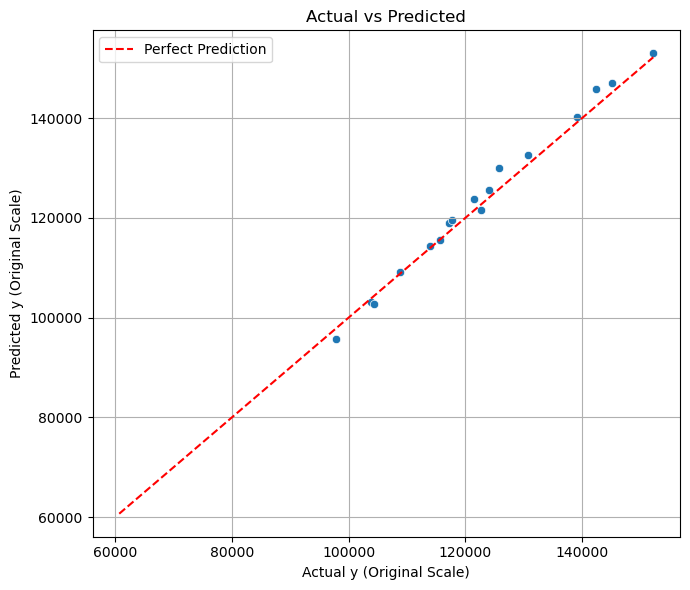

In [ ]:
plt.figure(figsize=(7, 6))
sns.scatterplot(x=y_test_o, y=y_pred_original)
plt.plot([min(y_test_o), max(y_test_o)],
         [min(y_test_o), max(y_test_o)],
         color='red', linestyle='--', label='Perfect Prediction')

plt.xlabel('Actual y (Original Scale)')
plt.ylabel('Predicted y (Original Scale)')
plt.title('Actual vs Predicted')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


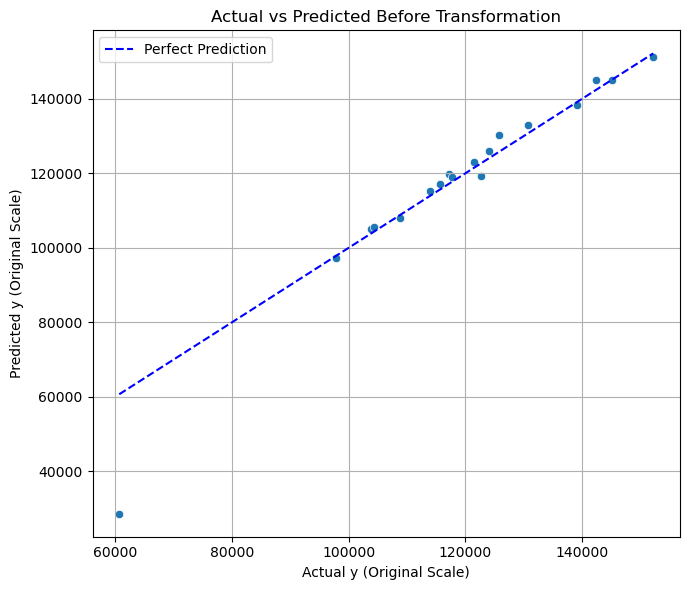

In [ ]:
#Before Transformation
plt.figure(figsize=(7, 6))
sns.scatterplot(x=y_test_o, y=y_pred_o)
plt.plot([min(y_test_o), max(y_test_o)],
         [min(y_test_o), max(y_test_o)],
         color='blue', linestyle='--', label='Perfect Prediction')

plt.xlabel('Actual y (Original Scale)')
plt.ylabel('Predicted y (Original Scale)')
plt.title('Actual vs Predicted Before Transformation')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#Option 1: Go with the untransformed model if our goal is pure prediction and it performs better

Option 2:  Stick with the Box-Cox transformed model if:
our residuals look much better (normal, homoscedastic)

We care about inference/interpretability/statistical rigor

Sometimes, there’s a trade-off between predictive performance and assumption validity.

In [ ]:
# Lets go with untransformed model for checking different types of residuals

In [ ]:
#Press Residual

In [ ]:
#Computation of hat matrix for leverage
X_t=X_test.T
X_t_X=np.dot(X_t,X_test)
X_t_X_inv=np.linalg.inv(X_t_X)
Hat_matrix=np.dot(np.dot(X_test,X_t_X_inv),X_t)

In [ ]:
h_ii=np.diag(Hat_matrix)
h_ii #Used for detection of leverage ,extrapolation

array([0.5491071 , 0.99173624, 0.90536721, 0.48203761, 0.61032247,
       0.7435198 , 0.7483568 , 0.58333429, 0.59037981, 0.45891566,
       0.9030724 , 0.6568468 , 0.93258238, 0.7218898 , 0.51136263,
       0.21026264, 0.55683249, 0.84407388])

In [ ]:
# PRESS residuals (press_i = e_i / (1 - h_ii))
press_residuals = (Residuals) / (1 - h_ii)

In [ ]:
press_residuals

76   -3.563973e+03
0     3.879850e+06
26   -1.236247e+04
22    2.015919e+03
12    4.396476e+02
67   -5.201089e+03
10   -7.844048e+03
18    1.720162e+03
4    -5.287277e+03
68   -5.139556e+03
84    7.264181e+03
65   -3.926741e+03
53    9.978068e+03
80   -1.631483e+04
83   -2.454656e+03
64   -1.857276e+03
33   -5.961384e+03
79    2.213502e+04
Name: weekly_revenue, dtype: float64

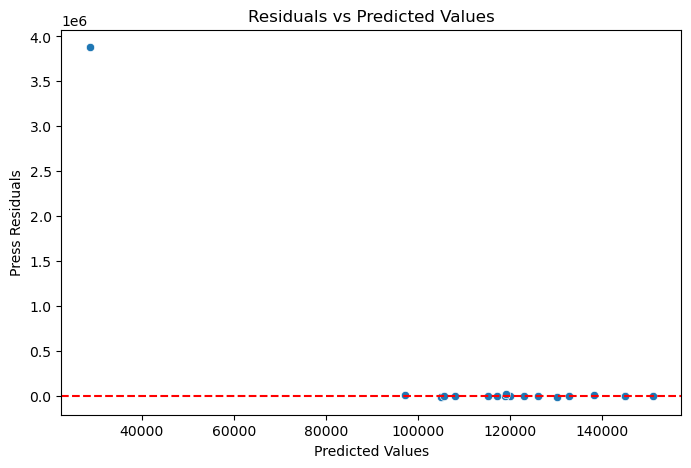

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred_o,y=press_residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Press Residuals")
plt.title("Residuals vs Predicted Values")
plt.show()
#Indicates Outlier

In [ ]:
press_sq=press_residuals**2

In [ ]:
press_statistic=sum(press_sq)

In [ ]:
press_statistic

15054521906737.006

In [ ]:
# Calculate TSS
y_mean = np.mean(y_test)
TSS = np.sum((y_test - y_mean) ** 2)

print("Total Sum of Squares (TSS):", TSS)

Total Sum of Squares (TSS): 2.318802962878541e+16


In [ ]:
R_Prediction=1-(press_statistic/TSS)

In [ ]:
R_Prediction

0.9993507632106848

In [ ]:
#Outlier Diagnostic

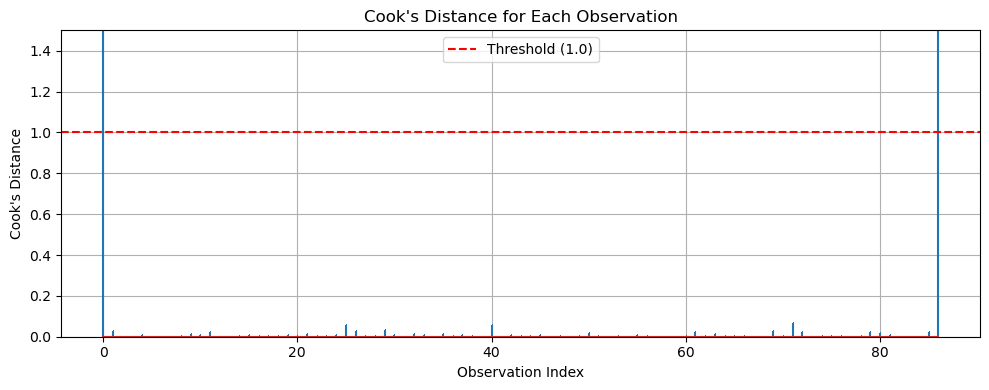

Influential points (Cook's D > 0.0460): [ 0 25 40 71 86]


In [ ]:
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

#Adding a constant (intercept term) to our features
X_with_const = sm.add_constant(X)

#Fit an OLS model using statsmodels
model = sm.OLS(y, X_with_const).fit()

#Get influence measures
influence = model.get_influence()

# Get Cook's distance
cooks_d, p_values = influence.cooks_distance

# Visualize Cook's Distance
plt.figure(figsize=(10, 4))
plt.stem(np.arange(len(cooks_d)), cooks_d, markerfmt=",")
plt.title("Cook's Distance for Each Observation")
plt.ylim(0,1.5)
plt.xlabel("Observation Index")
plt.ylabel("Cook's Distance")
plt.axhline(y=1, color='red', linestyle='--', label='Threshold (1.0)')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Identify influential points (common threshold: D > 4/n)
threshold = 4 / len(X)
influential_points = np.where(cooks_d > threshold)[0]

print(f"Influential points (Cook's D > {threshold:.4f}):", influential_points)


In [ ]:
pd.Series(cooks_d)

0      4.046943
1      0.026001
2      0.000012
3      0.001037
4      0.009812
        ...    
82     0.000749
83     0.000046
84     0.000052
85     0.021350
86    31.569851
Length: 87, dtype: float64

In [ ]:
from sklearn.linear_model import HuberRegressor
huber = HuberRegressor(alpha=0.1).fit(X, y)  # alpha = regularization strength

In [ ]:
#Checking DFFITS


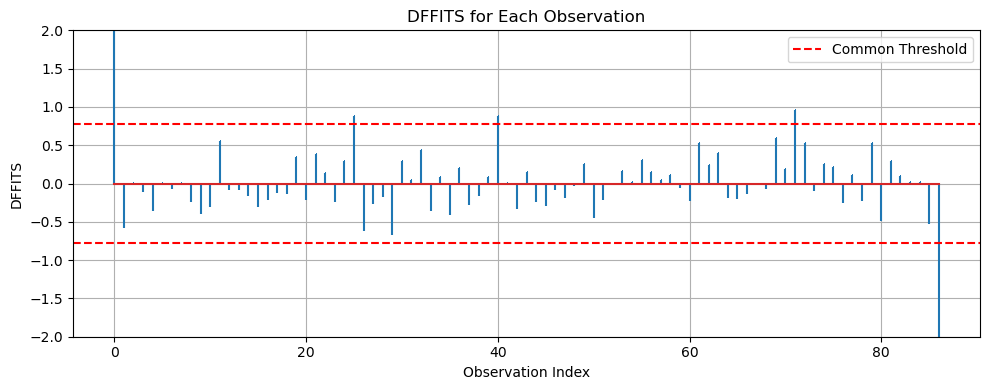

Influential points based on DFFITS (>|0.7731|): [ 0 25 40 71 86]


In [ ]:
dffits_values, _ = influence.dffits

#Visualize DFFITS
plt.figure(figsize=(10, 4))
plt.stem(np.arange(len(dffits_values)), dffits_values, markerfmt=",")
plt.axhline(y=2*np.sqrt(X_with_const.shape[1]/len(X_with_const)), color='red', linestyle='--', label='Common Threshold')
plt.axhline(y=-2*np.sqrt(X_with_const.shape[1]/len(X_with_const)), color='red', linestyle='--')
plt.ylim(-2, 2)
plt.title("DFFITS for Each Observation")
plt.xlabel("Observation Index")
plt.ylabel("DFFITS")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Step 6: Identify highly influential observations
threshold = 2 * np.sqrt(X_with_const.shape[1] / len(X_with_const))
influential_points = np.where(np.abs(dffits_values) > threshold)[0]

print(f"Influential points based on DFFITS (>|{threshold:.4f}|):", influential_points)

In [ ]:
#DFBETAS

In [ ]:
#  Extract DFBETAS
dfbetas = influence.dfbetas
dfbetas_df = pd.DataFrame(dfbetas, columns=model.params.index)
print(dfbetas_df.head())

      const      year      week  order_count  upi_share  cash_payment_ratio  \
0  0.848088 -0.759078 -1.510661    -0.355948  -1.996221           -1.251524   
1 -0.035325  0.034486  0.180470     0.139590   0.006230            0.016542   
2  0.000781 -0.000720 -0.006344    -0.000154   0.001760            0.003279   
3 -0.031897  0.032225  0.028817     0.001943  -0.015995           -0.029152   
4 -0.171090  0.169735  0.121970    -0.043307   0.027805           -0.162249   

   avg_order_value  retention_rate  avg_delivery_delay  on_time_delivery_rate  \
0        -4.930107       -0.864768            1.484956               1.666815   
1        -0.126216       -0.234361           -0.290780              -0.197130   
2         0.001746       -0.005505            0.000792               0.001510   
3        -0.052044        0.049151           -0.019360              -0.038054   
4         0.086631        0.095944            0.077513               0.079210   

   avg_stock_received  avg_damaged_sto

In [ ]:
#Lets work with parameter estimates

In [ ]:
Lin.coef_

array([  391217.28848178,   937264.76541518, 47589174.83014076,
        -475617.79681643,  -767519.25776578, 24401443.75937358,
        1274347.15062695,   622794.66462269,  1488373.8429413 ,
        -528202.56547389,   659015.96293579,  5005397.83613053])

In [ ]:
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
conf_int = model.conf_int(alpha=0.05)  # 95% CI
coefficients = model.params


In [ ]:
coefficients

const                     -2.493440e+06
year                       1.145205e+03
week                      -1.512531e+01
order_count                2.242882e+03
upi_share                 -1.762588e+04
cash_payment_ratio        -1.273458e+04
avg_order_value            4.913786e+01
retention_rate             8.064082e+03
avg_delivery_delay         1.445633e+03
on_time_delivery_rate      3.124470e+04
avg_stock_received        -2.831026e+03
avg_damaged_stock         -2.670165e+04
unique_products_stocked    3.490335e+02
dtype: float64

In [ ]:
conf_int

,0,1
const,-7.580200e+06,2.593320e+06
year,-1.395030e+03,3.685439e+03
week,-7.902365e+01,4.877302e+01
order_count,2.151234e+03,2.334529e+03
upi_share,-3.108088e+04,-4.170874e+03
cash_payment_ratio,-2.889606e+04,3.426900e+03
avg_order_value,4.442847e+01,5.384725e+01
retention_rate,-3.375265e+04,4.988081e+04
avg_delivery_delay,9.343226e+01,2.797834e+03
on_time_delivery_rate,1.069981e+04,5.178959e+04


## Goal of the Plot
We are trying to visually represent each regression coefficient
𝛽i along with its 95% confidence interval.
This gives an intuitive sense of:
i)How large the estimate is.
ii)How uncertain the estimate is.
iii)Whether zero lies within the interval (i.e., if it's statistically significant).

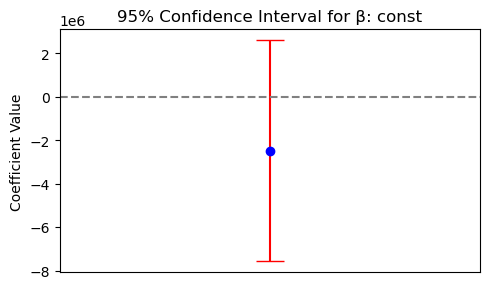

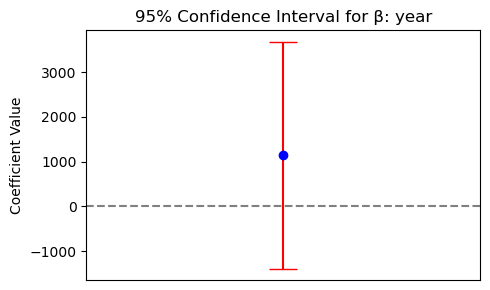

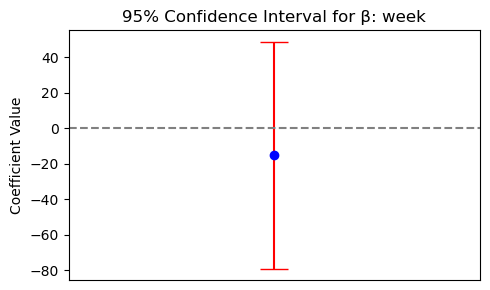

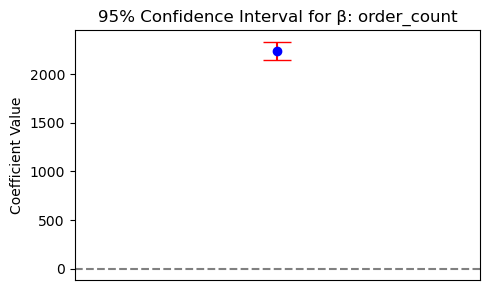

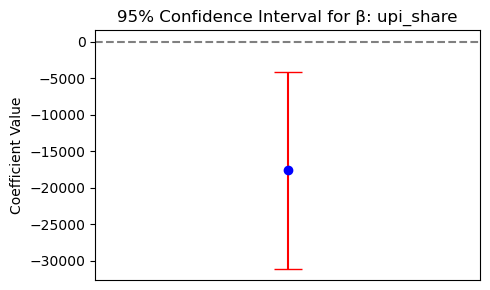

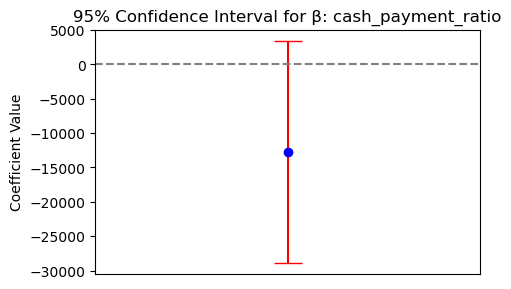

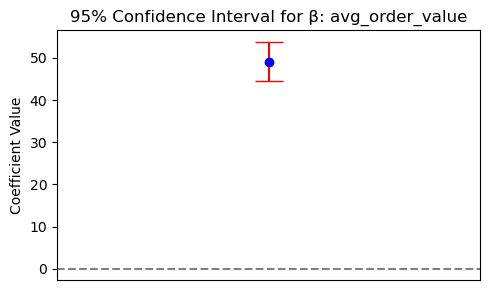

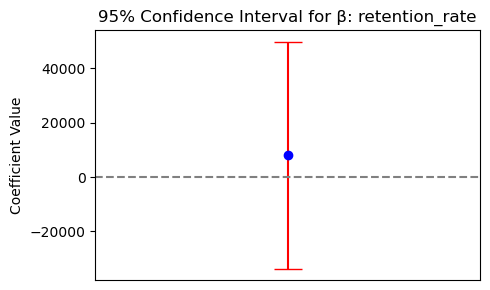

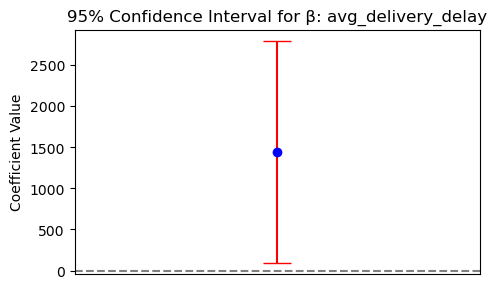

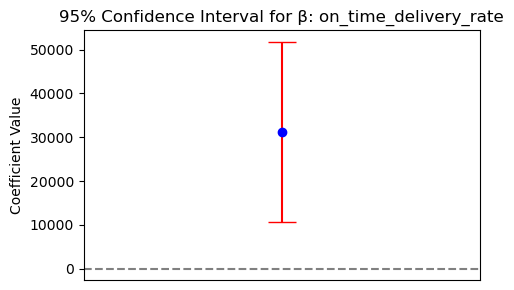

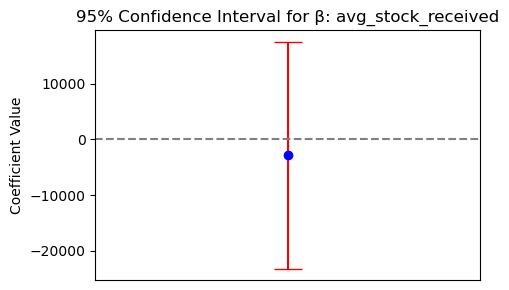

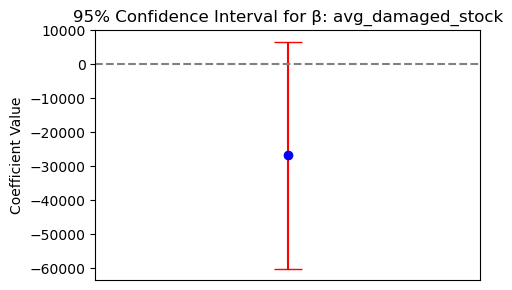

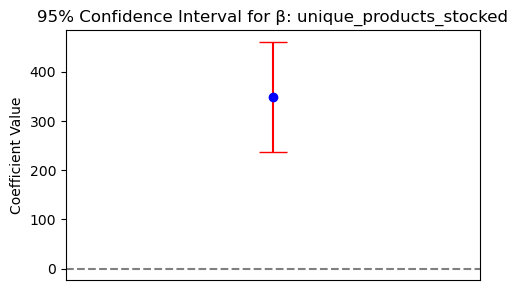

In [ ]:
for i, coef_name in enumerate(coefficients.index):
    coef_val = coefficients[coef_name]
    lower, upper = conf_int.loc[coef_name]

    plt.figure(figsize=(5, 3))
    plt.errorbar(0, coef_val,
                 yerr=[[coef_val - lower], [upper -coef_val]],
                 fmt='o', capsize=10, color='blue', ecolor='red')

    plt.axhline(0, color='gray', linestyle='--')
    plt.title(f"95% Confidence Interval for β: {coef_name}")
    plt.xlim(-1, 1)  # Keep x static for all plots
    plt.xticks([])
    plt.ylabel('Coefficient Value')
    plt.tight_layout()
    plt.show()

In [ ]:
#Multicollinearity


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant


In [ ]:
X = add_constant(X)
vif_df = pd.DataFrame()
vif_df["Feature"] = X.columns
vif_df["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [ ]:
print(vif_df)

                    Feature           VIF
0                     const  5.075900e+07
1                      year  3.160832e+00
2                      week  1.411349e+00
3               order_count  1.769193e+00
4                 upi_share  1.537854e+00
5        cash_payment_ratio  1.332707e+00
6           avg_order_value  1.761351e+00
7            retention_rate  1.183214e+00
8        avg_delivery_delay  3.338767e+00
9     on_time_delivery_rate  4.533016e+00
10       avg_stock_received  2.318478e+00
11        avg_damaged_stock  3.950333e+00
12  unique_products_stocked  2.330700e+00


In [ ]:
#No multicollinearity